# SyriaTel Customer Churn

I am remaking the SyriaTel customer churn project that I did with Flatiron School again with the original, larger dataset, hopefully with better results.

## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy

## The Data

In [3]:
original = pd.read_csv('/Users/Arsh/Flatiron/Gitlab/Projects/SyrialTel/train.csv')
df = deepcopy(original)
df

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [5]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


## Exploratory Data Analysis
I am going to do EDA, looking at all fields generally, then analyzing all of them separately.

In [6]:
df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Several things stick out when looking at the basic mathematical data of the numeric fields in the data.
Account length: The median customer had their account for 100 months. The interquartile range is from 73 months to 127 months. Less than 25% of customers had an account for less than 73 months. Note to self: LOOK IF THERE IS RELATIONSHIP BASED ON ACCOUNT LENGTH and CHURN. 
Voicemail messages: Most people had no voicemail messages. Atleast 50% of customers had 0 voicemail messages. 
Time of day: Looking at the data, customers, in general, made more calls in the evening and night commpared to the day.
International: It looks like that international calls were used sparingly by customers, presumably, as my intuition tells me, due to higher fees compared to regular calls. 
Numvber of customer service calls: It looks like most customers called customer service very infrequently, with 75% of customers only calling customer service a maximum of 2 times.

In [7]:
df.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

This is a cleaned dataset, but had to check just to be sure.

In [8]:
print(df.area_code.unique())
print(df.area_code.value_counts(normalize =True))
print("")
print('As you can see, the dataset is comprised of customers who have numbers with only 3 area codes.')

['area_code_415' 'area_code_408' 'area_code_510']
area_code_415    0.496000
area_code_408    0.255529
area_code_510    0.248471
Name: area_code, dtype: float64

As you can see, the dataset is comprised of customers who have numbers with only 3 area codes.


In [9]:
print(df['state'].unique())
print(len(df['state'].unique()))
print("")
print('As you can see, the dataset is comprised of customers who live in multiple states. This is curious because of 3 area codes, which are usually state or region specific.')

['OH' 'NJ' 'OK' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY' 'ID' 'VA'
 'TX' 'FL' 'CO' 'AZ' 'SC' 'WY' 'HI' 'NH' 'AK' 'GA' 'MD' 'AR' 'WI' 'OR'
 'MI' 'DE' 'UT' 'CA' 'SD' 'NC' 'WA' 'MN' 'NM' 'NV' 'DC' 'VT' 'KY' 'ME'
 'MS' 'AL' 'NE' 'KS' 'TN' 'IL' 'PA' 'CT' 'ND']
51

As you can see, the dataset is comprised of customers who live in multiple states. This is curious because of 3 area codes, which are usually state or region specific.


In [10]:
query1 = df.international_plan.value_counts()
print(query1)
query2 = df.international_plan.value_counts(normalize = True)
print(query2)
print("")
print('As you can see, over 90% of customers do not have an international plan.')

no     3854
yes     396
Name: international_plan, dtype: int64
no     0.906824
yes    0.093176
Name: international_plan, dtype: float64

As you can see, over 90% of customers do not have an international plan.


In [11]:
query1 = df.voice_mail_plan.value_counts()
print(query1)
query2 = df.voice_mail_plan.value_counts(normalize = True)
print(query2)
print("")
print('As you can see, nearly three quarters of customers do not have a voicemail plan.')

no     3138
yes    1112
Name: voice_mail_plan, dtype: int64
no     0.738353
yes    0.261647
Name: voice_mail_plan, dtype: float64

As you can see, nearly three quarters of customers do not have a voicemail plan.


In [12]:
day_cost = df['total_day_charge'].sum() / df['total_day_minutes'].sum()
eve_cost = df['total_eve_charge'].sum() / df['total_eve_minutes'].sum()
night_cost = df['total_night_charge'].sum() / df['total_night_minutes'].sum()
print(day_cost)
print(eve_cost)
print(night_cost)
print("")
print('As we can see from the data, customers were charged, on average, $0.17 per minute for calls made during the day, $0.085 per minute for calls made in the evening, and $0.045 per minute for calls made at night.')

0.17000305311307234
0.08500114782546143
0.045000683490105824

As we can see from the data, customers were charged, on average, $0.17 per minute for calls made during the day, $0.085 per minute for calls made in the evening, and $0.045 per minute for calls made at night.


In [13]:
print("Finally, now we will look at customer churn.")
print("")
print(df.churn.value_counts())
print("")
print(df.churn.value_counts(normalize = True))
print("")
print('As we can see out of the whole dataset, only 598 or approximately 14% of the customer base churned, or ended their relationship with the company. This will make it difficult to predict this class when we begin modeling.')

Finally, now we will look at customer churn.

no     3652
yes     598
Name: churn, dtype: int64

no     0.859294
yes    0.140706
Name: churn, dtype: float64

As we can see out of the whole dataset, only 598 or approximately 14% of the customer base churned, or ended their relationship with the company. This will make it difficult to predict this class when we begin modeling.


Having looked at all of the variables individually, now I will convert all my categorical data into numerical data types in order to make the data ready for modeling and so that it we do more statistical analysis on the data.

In [14]:
print(df.dtypes)
print("")
print("As we can see, we need to clean and convert several data types.") 
print("First off, state and area code need to be transformed into dummy columns, as they are categorical values that should be coverted into nominal data.")
print("Second, international plan, voice mail plan, and churn need to be converted to boolean columns.")
print("NOTE: When I first did this project, I mapped the target column to a binary 0 and 1 numerical column. I will do both that and creating a separate boolean column to see if the modeling works better with either columns.")

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

As we can see, we need to clean and convert several data types.
First off, state and area code need to be transformed into dummy columns, as they are categorical val

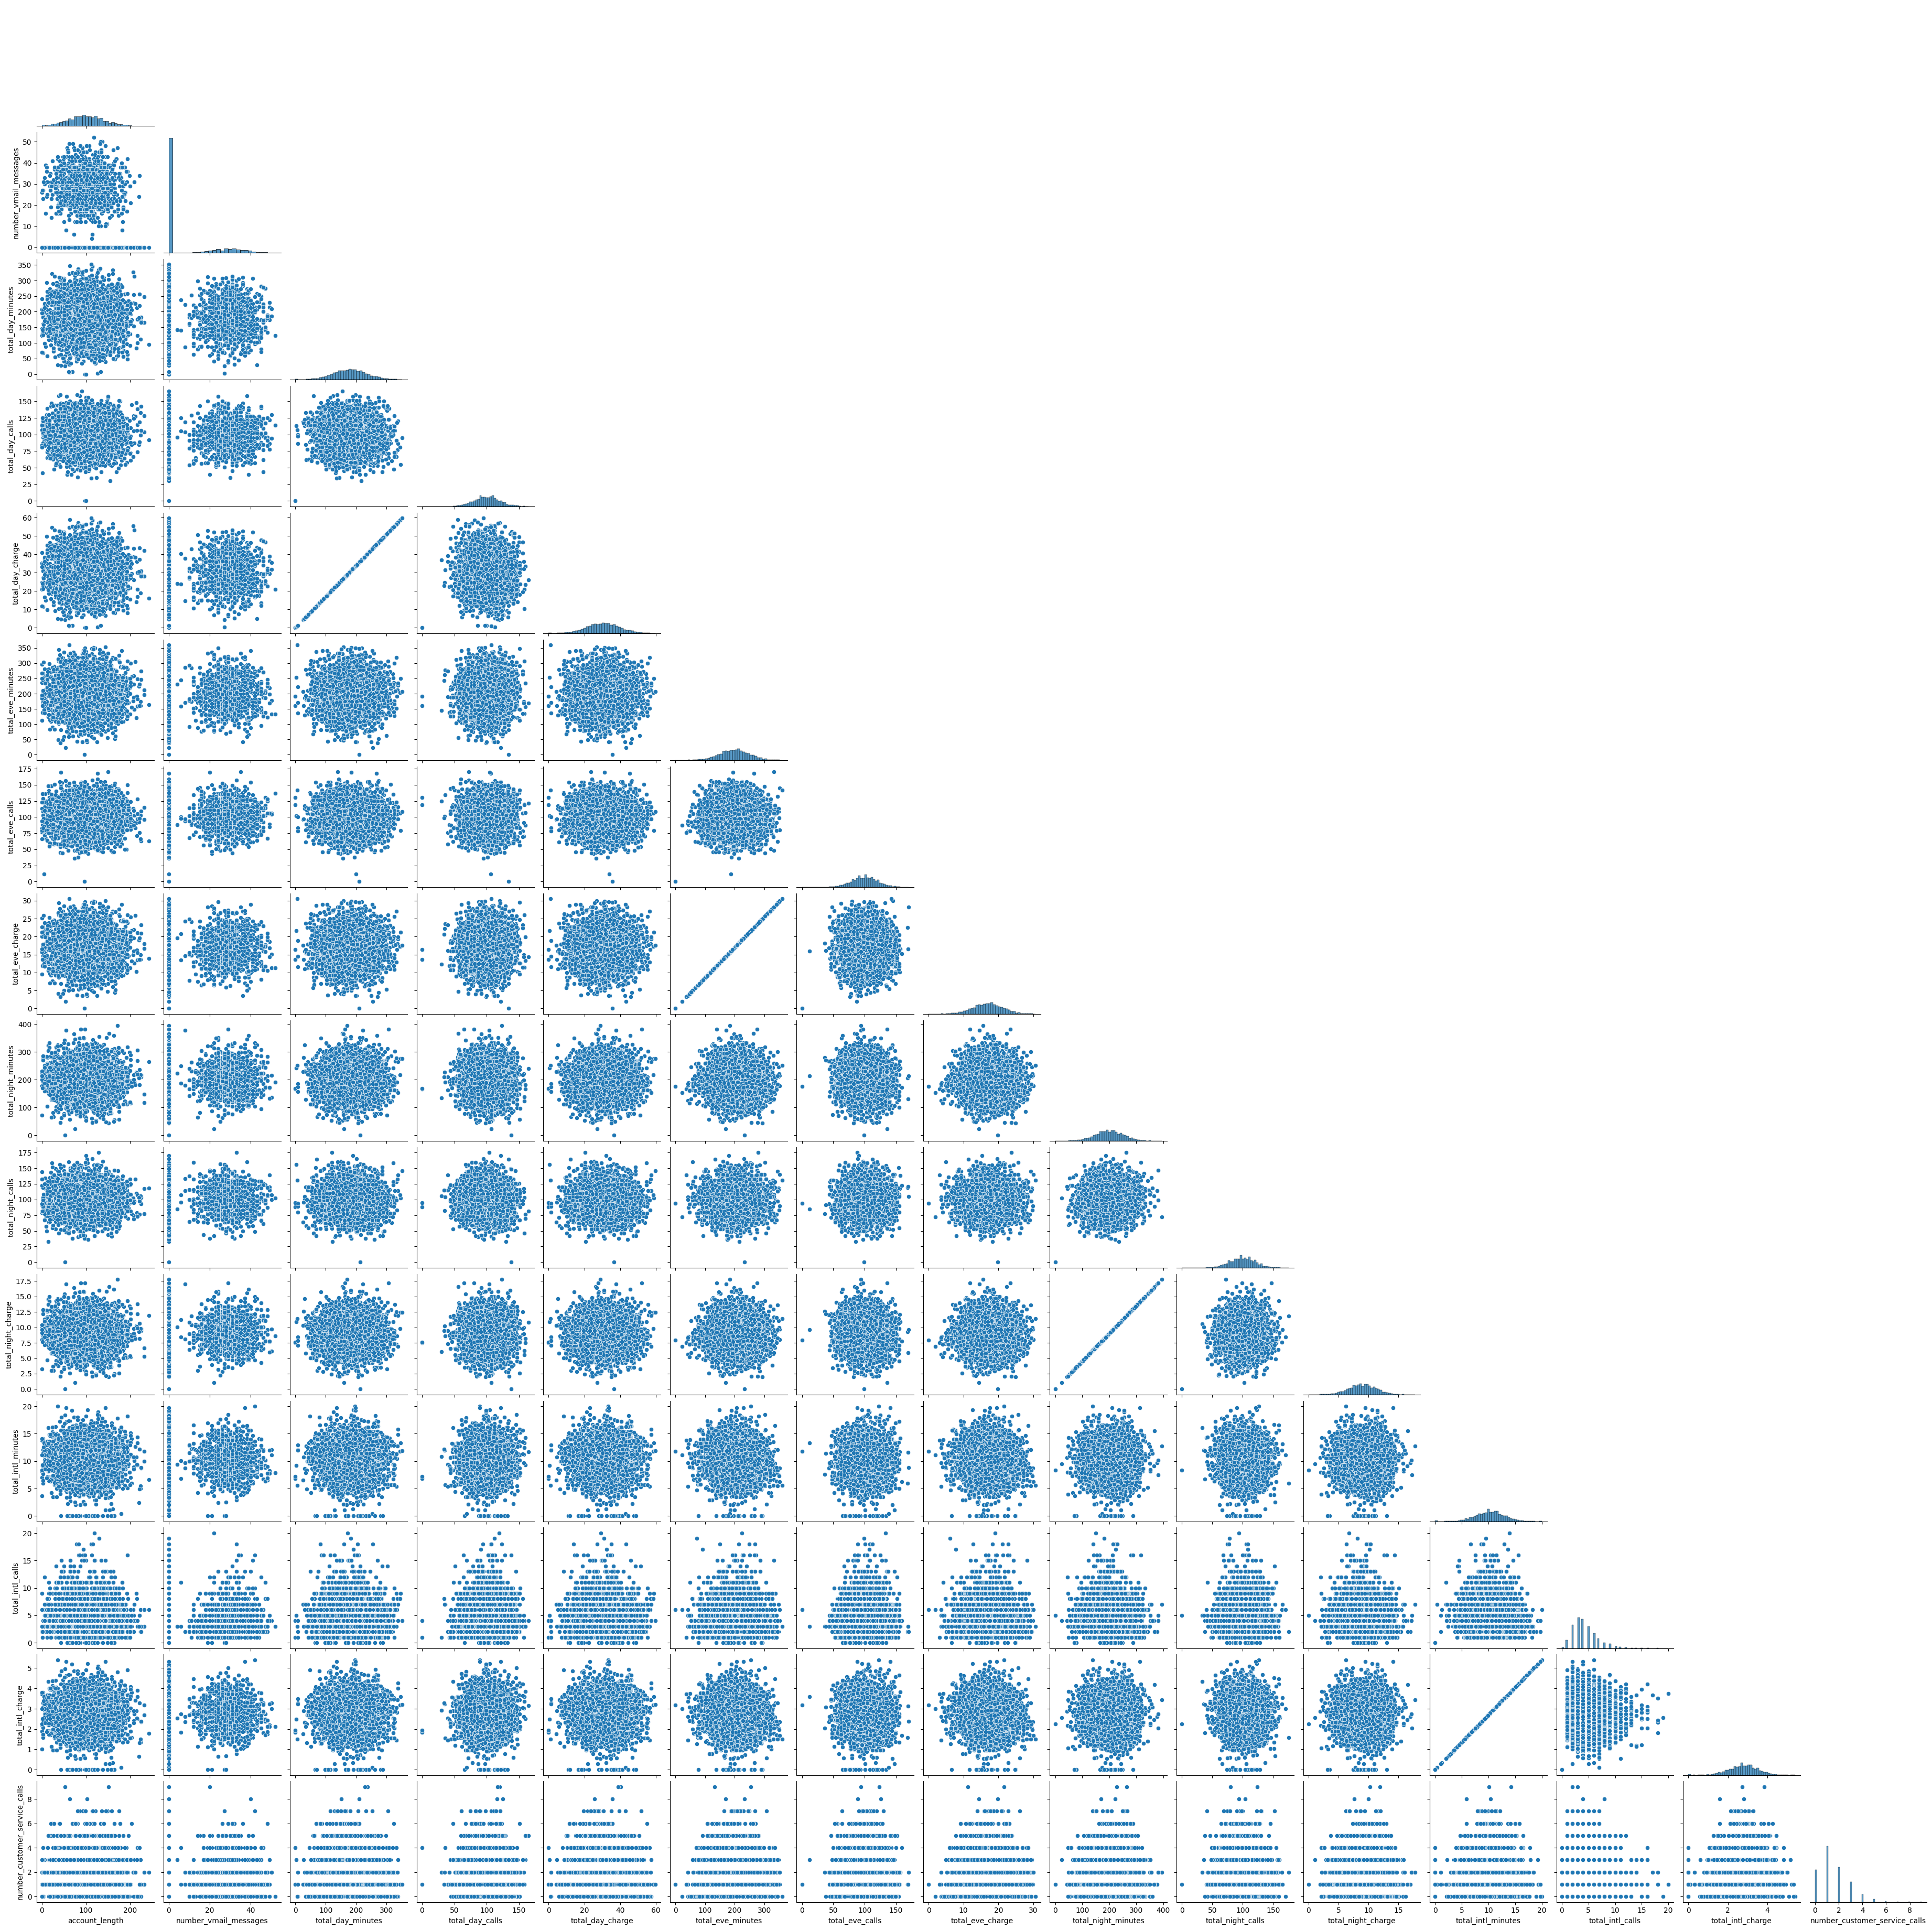

In [16]:
sns.pairplot(df, corner = True)
plt.show()

As we can see from the pairplot, there is little collinearity visible between different variables or visible patterns, with the exception of linear realtionships between phones charges and the numnber of minutes. As a result, I will be dropping the minutes variables to reduce multicollinearity.

### Data Wrangling

In [57]:
print("As I will be transforming the data, I will create a new df, d1, to create these changes and new variables. I will start by making the dummy columns I need.")
df1 = pd.get_dummies(df,columns=['state', 'area_code'], drop_first=True)
df1.head()

As I will be transforming the data, I will create a new df, d1, to create these changes and new variables. I will start by making the dummy columns I need.


,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_area_code_415,area_code_area_code_510
0,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,...,0,0,0,0,0,0,0,0,1,0
1,137,no,no,0,243.4,114,41.38,121.2,110,10.30,...,0,0,0,0,0,0,0,0,1,0
2,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,...,0,0,0,0,0,0,0,0,0,0
3,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,...,0,0,0,0,0,0,0,0,1,0
4,121,no,yes,24,218.2,88,37.09,348.5,108,29.62,...,0,0,0,0,0,0,0,0,0,1


In [58]:
df1["voice_mail_plan"] = df1["voice_mail_plan"].replace({"no": 0, "yes": 1}).astype("int64")
df1["international_plan"] = df1["international_plan"].replace({"no": 0, "yes": 1}).astype("int64")
df1["churn"] = df1["churn"].replace({"no": False, "yes": True}).astype("bool")
df1['churn_num'] = df1['churn'].map({False: 0, True: 1})
df1 = df1.drop(columns = ['total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes'])
df1

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,...,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_area_code_415,area_code_area_code_510,churn_num
0,107,0,1,26,123,27.47,103,16.62,103,11.45,...,0,0,0,0,0,0,0,1,0,0
1,137,0,0,0,114,41.38,110,10.30,104,7.32,...,0,0,0,0,0,0,0,1,0,0
2,84,1,0,0,71,50.90,88,5.26,89,8.86,...,0,0,0,0,0,0,0,0,0,0
3,75,1,0,0,113,28.34,122,12.61,121,8.41,...,0,0,0,0,0,0,0,1,0,0
4,121,0,1,24,88,37.09,108,29.62,118,9.57,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,83,0,0,0,70,32.01,88,20.72,79,9.62,...,0,0,0,0,0,0,0,1,0,0
4246,73,0,0,0,89,30.24,82,11.15,89,8.38,...,0,0,0,0,0,1,0,0,0,0
4247,75,0,0,0,101,29.02,126,16.41,104,5.81,...,0,0,0,0,0,0,0,0,0,0
4248,50,0,1,40,127,40.07,126,18.96,116,13.39,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df1.churn_num.sum()

598

In [66]:
df1.corr('churn')

ValueError: method must be either 'pearson', 'spearman', 'kendall', or a callable, 'churn' was supplied